<a href="https://colab.research.google.com/github/Handrum/ML_Equipo_6/blob/main/A2a_DL_TC5033_AD2023_A01793918.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## **Deep Learning**
## **Fully Connected Deep Neural Networks using PyTorch**
<br>

#### **Activity 2a**: Implementing a FC for ASL Dataset using PyTorch
<br>


- **Objective**

    The primary aim of this activity is to transition from using Numpy for network implementation to utilizing PyTorch, a powerful deep learning framework. You will be replicating the work you did for the ASL dataset in Activity 1b, but this time, you'll implement a your multi layer FC model using PyTorch.
    
- **Instructions**

    **Review Previous Work**: Begin by reviewing your Numpy-based Fully Connected Network for the ASL dataset from Activity 1b. Note the architecture, hyperparameters, and performance metrics for comparison.

    **Introduce PyTorch**: If you're new to PyTorch, take some time to familiarize yourself with its basic operations and syntax. You can consult the official documentation or follow online tutorials.

    **Prepare the ASL Dataset**: As before, download and preprocess the Kaggle ASL dataset.

    **Implement the Network**: Design your network architecture tailored for the ASL dataset. Pay special attention to PyTorch modules like nn.Linear() and nn.ReLU().

    **Train the Model**: Implement the training loop, making use of PyTorch's autograd to handle backpropagation. Monitor metrics like loss and accuracy as the model trains.

    **Analyze and Document**: In Markdown cells, discuss the architecture choices, any differences in performance between the Numpy and PyTorch implementations, and insights gained from using a deep learning framework like PyTorch.

#**Import of libraries**

In [110]:
#jupyterthemes installation in case you need to use this module
!pip install jupyterthemes

In [111]:
#Import of libraries to be used to implement fully connected deep neural networks using PyTorch models.
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

#PyTorch stuff
import torch
import torch.nn as nn
import torch.nn.functional as F

# Solamente para usuarios de Jupyter Themes
from jupyterthemes import jtplot
jtplot.style(grid=False)

In [112]:
##Data is loaded from local
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = '/content/asl_data/'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

### **Always a good idea to explore the data**

Our dataset contains: 27455 rows × 784 columns

In [113]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### **Get training label data**

In [114]:
#End result of this code is 4 variables (y_train, y_val, x_train, x_val):
y_train = np.array(train_df['label']) #labels for training
y_val = np.array(valid_df['label']) #labels for validation
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32) #features for training
x_val = valid_df.values.astype(np.float32) #characteristics for validation

In [115]:
#Data is printed
print(x_train.shape)
print(y_train.shape)

(27455, 784)
(27455,)


In [116]:
#Check the number of examples in the feature set matches the number of labels
#to avoid errors when training models
#x_val.shape returns (7172, 784 | 7172 validation examples, each with 784 features)
#y_val.shape returns (7172 matching labels)
print(x_val.shape, y_val.shape)

(7172, 784) (7172,)


Proposes of function **split_val_tes**

- This function proposes to split the data and labels (x, y, respectively) into two subsets based on the percentage specified by the pct parameter. The function has the ability to randomly shuffle the data before performing the split if the shuffle flag is set.

The function returns **four values**:
* The **data** and **labels** of the first subset,
* and the **data** and **labels** of the second subset.

Definition of the split_val_test function with **parameters**:
- **x**: input data
- **y**: labels corresponding to x
- **pct**: split percentage (by default 0.5, which means 50%)

In [117]:
def split_val_test(x, y, pct=0.5, shuffle=True):

    # Ensure that the number of samples in x is equal to the number of samples in y
    assert x.shape[0] == y.shape[0], 'Number of samples x!= number samples y'
    total_samples = x.shape[0] # Obtener el número total de muestras

    if shuffle: # shuffle: a flag to decide whether to shuffle the data before splitting (default True)
        idxs = np.arange(x.shape[0]) # Create an array of indexes from 0 to the length of x
        np.random.shuffle(idxs) # Mix the index array

        # Rearrange x and y using the mixed indexes
        x = x[idxs]
        y = y[idxs]
        #return x_val, y_val, x_test, y_test
#         return x[:total_samples//2, :], y[:total_samples//2], x[total_samples//2:, :], y[total_samples//2:]

    # Divide x and y based on the specified percentage and return the two subsets
    return x[:int(total_samples*pct), :], y[:int(total_samples*pct)], x[int(total_samples*(pct)):, :], y[int(total_samples*(pct)):]


In [118]:
# It splits the existing validation set into two new sets: validation and test.
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [119]:
#Determine the data type or class of the variable y_val.
type(y_val)

numpy.ndarray

In [120]:
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(3586, 784) (3586,)
(3586, 784) (3586,)


###**Created list**
A list is created with all the letters of the lowercase English alphabet (which originally has 26 letters) and then the letters 'j' and 'z' are removed.

In [121]:
alphabet=list(string.ascii_lowercase) # We create a list called 'alphabet' that contains all the lowercase letters of the English alphabet.
alphabet.remove('j') # Eliminamos la letra 'j' and "z" de la lista 'alphabet'.
alphabet.remove('z')
print(len(alphabet)) # Imprimimos la longitud actual de la lista 'alphabet'.

24


### **Normalise the data**

**Parameters:**

* **x_mean**: This represents the mean (average) of the data.
* **x_std**: This stands for the standard deviation of the data.
* **x_data**: This is the actual data that you want to normalize.

The purpose of this function is to ensure that the data will be at a mean of 0 and a standard deviation of 1 after normalization.

In [122]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [123]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)


In [124]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

###**Graphing the data**

In [125]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

In [126]:
type(x_val)

numpy.ndarray

La imagen muestreada representa un: f


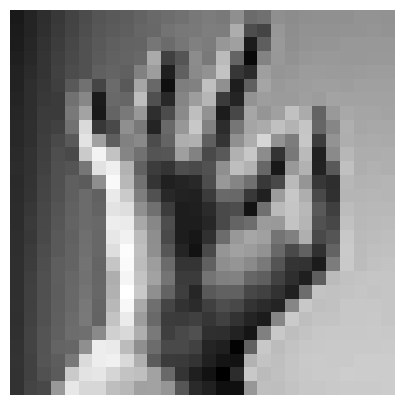

In [127]:
rnd_idx = np.random.randint(len(y_val))
# print(rnd_idx)
# print(y_val[rnd_idx])
print(f'La imagen muestreada representa un: {alphabet[y_val[rnd_idx]]}')
plot_number(x_val[rnd_idx].reshape(28,28))

![evidencia3](https://i.imgur.com/ib5RsEY.jpg[/img])

### **The model numérico**

$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### **Create minibatches**

It prepares data prior to training an ML model by dividing a large data set into smaller batches and optionally mixing them.

With the following named function: **create_minibatches** Splits a data set (such as images (X) and their respective labels (y)) into smaller batches or "mini-batches". It is an optimization method called **minibatch stochastic gradient descent** (mini-batch stochastic gradient descent).

La función create_minibatches toma cuatro argumentos:

- **mb_size**: The size of the minibatch (how many samples we want per batch).
- **x**: The input samples (e.g. images).
- **y**: The labels corresponding to the input samples.
- **shuffle**: An optional parameter that indicates if we want to shuffle the data before creating the minibatches. By default, it is set to true

In [128]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]

    #Data blending (if shuffle is true)
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    #Generate and return minibatches:
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

In [129]:
for i, (x, y) in enumerate(create_minibatches(128,x_train, y_train)): #Return a list (or some kind of iterable) of minibatches, where each minibatch is a pair of data (x, y).
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214


### **Now the PyTorch part**

In [130]:
#Tensors are created for each training, validation and test data set.
x_train_tensor = torch.tensor(x_train.copy())
y_train_tensor = torch.tensor(y_train.copy())

x_val_tensor = torch.tensor(x_val.copy())
y_val_tensor = torch.tensor(y_val.copy())

x_test_tensor = torch.tensor(x_test.copy())
y_test_tensor = torch.tensor(y_test.copy())

In [131]:
#Validation of the device on which the models are to be trained
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


## **Accuracy**

If we want to measure the performance of a model after training it or during its validation, the combination between accuracy and cost provides a complete view of the behavior of our models, with this we could make decisions that allow us to improve it if it is the case or give it the use if it is ready.

According to what the professor says in the video we could say the following:

The **accuracy function** evaluates the performance of a model using four parameters: the model itself, the dataset inputs, the actual labels and the minibatch size. It starts by initializing counters and an accumulator to monitor correct predictions, total predictions and cost respectively. The model is put into evaluation mode and transferred to the appropriate device, such as a GPU. ***During the evaluation, no gradients are calculated to optimize efficiency.

In the process, **minibatches are used to compare the model predictions with the actual labels**, thus calculating **accuracy and cost**. Finally, the function **provides the average cost and accuracy to get a clear idea of the model performance**, being useful for post-training reviews or validations.

In [132]:
def accuracy(model, x, y, mb_size):
    num_correct = 0
    num_total = 0
    cost = 0.
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x, y),1):
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10
            cost += (F.cross_entropy(scores, yi)).item()
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi.squeeze()).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)

        return cost/mb, float(num_correct)/num_total

### **Training Loop**
- Basic structure for training deep learning models in PyTorch

Train function:

This function trains a model given an optimizer, a minibatch size and a number of epochs.

**Parameters**:

- **model**: the model to train.
- **optimizer**: the optimizer to use (e.g. SGD, Adam, etc.).
- **mb_size**: size of the minibatch (number of examples to be processed at a time).
- **epochs**: number of times the algorithm must traverse the whole training set. It has a default value of 100.

- **Move the model to the device:** model = model.to(device=)

- **model** = model.to(device=device): This moves the model to the specified device (usually CPU or GPU) for faster computations in case of a GPU.

**Variable initialization:**

- Some variables are initialized to keep track of the cost and performance of the model.

**Training loop:**

- Iterates over a specified number of epochs.
Within each epoch, iterate over the minibatches of the training set.

**Data preparation:**

- Data is moved from the minibatch to the minibatch.
- The minibatch data is moved to the appropriate device and matched to the correct data types.

**Forward step:**

- Data is passed through the model to obtain scores, which are the model's predictions.

**Cost calculation:** Cross entropy is used as a cost function.

**Backpropagation:**

- Gradients are set to zero (this is necessary because PyTorch accumulates gradients).
Backpropagate the gradients using cost.backward().
Update the model weights with optimiser.step().

**Countability:**

- The number of correct predictions is calculated and added to the total number of examples processed.
The cost is accumulated.

**Validation:**

- Once all minibatches in an epoch have been iterated over, the performance of the model is evaluated on a validation set.

**Metrics printing:**

- Every 20 epochs, metrics such as cost and accuracy are printed on the training and validation set.

In [133]:
def train(model, optimiser, mb_size, epochs=100):
    model = model.to(device=device)
    train_cost = 0.
    val_cost = 0.
    for epoch in range(epochs):
        train_correct_num  = 0.
        train_total = 0.
        train_cost_acum = 0
        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x_train_tensor, y_train_tensor), 1):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            # funcion cost
            cost = F.cross_entropy(input= scores, target=yi.squeeze())
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            train_correct_num += (torch.argmax(scores, dim=1) == yi.squeeze()).sum()
            train_total += scores.size(0)

            train_cost_acum += cost.item()

        val_cost, val_acc = accuracy(model, x_val_tensor, y_val_tensor, mb_size)
        train_acc = float(train_correct_num)/train_total
        train_cost = train_cost_acum/mb
        if epoch%20 == 0:
            print(f'Epoch:{epoch}, train cost: {train_cost:.6f}, val cost: {val_cost:.6f},'
                      f' train acc: {train_acc:.4f}, val acc: {val_acc:4f},'
                      f' lr: {optimiser.param_groups[0]["lr"]:.6f}')


### **Model using Sequential**

This phase is important, as the input and output layers must be stacked to form a complete network.

- The following code defines a **simple neural network **with a **hidden layer**, configures it with an **optimizer** and a **learning rate scheduler**, and then **trains the model**.

In [134]:
#Instanciar modelo
# hidden1 = 100
hidden = 200          #capa oculta con 200 neuronas
lr = 5e-3             #learning rate (lr) of 0.005 for the optimizer
epochs = 20           #Number of epochs (complete passes through the training set) planned to train the model is 20.
mb_size = 512         #Minibatch (or batch) size as 512. During training, the model will be trained with subsets of 512 examples at a time.

#The neural model called model1 is defined using a sequential model.
model1 = nn.Sequential(nn.Linear(in_features=784, out_features=hidden),     #A linear (or fully connected) layer that takes 784 input features and produces 200 output features (neurons).
                       nn.Dropout(),                                        #A dropout layer to regularize the model and prevent overfitting.
                       nn.ReLU(),                                           #A ReLU activation function
                      #nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=24))

# optimiser = torch.optim.SGD(model1.parameters(), lr=lr, momentum=0.9, weight_decay=1e-2)
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, weight_decay=1e-4)

#Define un programador de tasa de aprendizaje (scheduler) que ajusta la tasa de aprendizaje durante el entrenamiento.
#En este caso, se utiliza la política OneCycleLR con un max_lr de 0.1, y se espera que se ejecute durante 20 épocas con 215 pasos por época.
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, 0.1, epochs=epochs, steps_per_epoch=215)

#Se llama a una función train para entrenar el modelo usando el optimizador, tamaño de minibatch y número de épocas definidos anteriormente.
train(model1, optimiser, mb_size, epochs)

Epoch:0, train cost: 1.165838, val cost: 0.754017, train acc: 0.6287, val acc: 0.738427, lr: 0.004000


In [138]:
#The accuracy function is called
accuracy(model1, x_test_tensor, y_test_tensor, mb_size)[1]

0.7947573898494144

###**Predictions of the model**

This function takes an input and a model, and returns the predicted classes for that input using the given model


In [139]:
def predict(x, model):
    x = x.to(device=device, dtype = torch.float32)        ##X = Represents the input data you want to predic
    scores = model(x) # mb_size, 10                       ##Score for each possible class
    _, pred = scores.max(dim=1) #pred shape (mb_size )    ##The method returns two values: the maximum values and the indices of those maximum values.
    return pred                                           ##The function returns pred, which is a tensor with the predicted classes for each example in the batch.

La imagen muestreada representa un: n


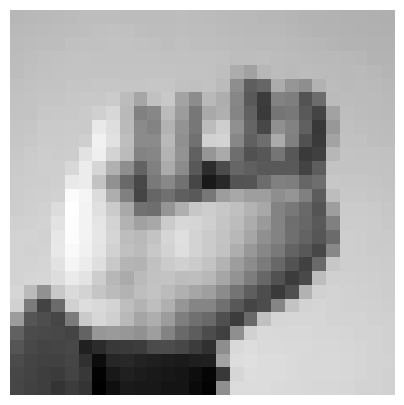

el valor predicho n


In [140]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {alphabet[y_test[rnd_idx]]}')
plot_number(x_test[rnd_idx].reshape(28,28))
pred=predict(x_test_tensor[rnd_idx].reshape(1, -1), model1)
print(f'el valor predicho {alphabet[pred]}')

##**Conclusions**

- We could say that in this activity we worked with a simple neural network with a tool called PyTorch, which helps us to build that stack of neurons in a simpler way. In addition, it helps us to assemble the neurons so that they interact and it is a manageable machine at the time of processing the information, since the deeper it is or the more layers it has, the more complex and detailed it becomes.

##**Bibliography**

**Vídeos**

* (Vídeo opcional) [Pepe Cantoral, Ph.D.]. (2021, 6 de julio). ¡Red Neuronal usando PyTorch! Tutorial de PyTorchEnlaces a un sitio externo.  [Archivo de vídeo]. YouTube

* [Pepe Cantoral, Ph-D.]. (2021, 19 de marzo). Backpropagation - Gradient Descent, Ejemplo completo –Fundamentos de Deep Learning – (Parte 9)Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 27 de marzo). Funciones de Activación – Fundamentos de Deep Learning – (Parte 10) [Archivo de vídeo]Enlaces a un sitio externo.. [Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 31 de marzo). Redes Neuronales Multi-Capa / Deep Neural Networks – Fundamentos de Deep Learning -(Teoría parte 11)Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 15 de mayo). ¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING!Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 18 de mayo). ¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING - Parte 2!Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 11 de diciembre). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 1Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 13 de diciembre). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 2Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 17 de diciembre). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 3Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, 17 de diciembre). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 4Enlaces a un sitio externo.[Archivo de vídeo]. YouTube.

**Libro**

* Raschka, S., Liu, Y. (., Mirjalili, V., Dzhulgakov, D. (2022). Aprendizaje automático con PyTorch y Scikit-Learn: desarrollo de modelos de aprendizaje automático y aprendizaje profundo con Python . Reino Unido: Packt Publishing.  
Lea el Capítulo 14.

**Documentos**

* Ioffe, S. y Szehedy, C. (2015). Normalización de lotes: acelerar el entrenamiento profundo de la red reduciendo el cambio de covariables internoEnlaces a un sitio externo..

Este artículo presenta la normalización por lotes, un método para acelerar el entrenamiento y mejorar el rendimiento.

* Él, K., Zhang, X., Ren, S. y Sun, J. (2015). Profundizando en los rectificadores: superando el rendimiento a nivel humano en la clasificación ImageNetEnlaces a un sitio externo..

* Este artículo presenta un nuevo método para la inicialización de peso (inicialización He), que considera las
no linealidades del rectificador para la inicialización profunda de la red.